# Proyek Klasifikasi Gambar: Intel Image Classification
- **Nama:** Glendy Hernandez Putra Mahardika Gunantoro
- **Email:** glendyhernandezpmg@gmail.com
- **ID Dicoding:** glendy25
- **Sumber Dataset:** https://www.kaggle.com/datasets/puneet6060/intel-image-classification

Ini adalah data gambar Pemandangan Alam di seluruh dunia. <br>
terdapat 6 kategori gambar : <br>
- buildings
- forest
- glacier
- mountain
- sea
- street

## Import Semua Packages/Library yang Digunakan

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from glob import glob
import random
from pathlib import Path
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

## Data Preparation

### Data Loading

In [ ]:
train_dir = 'dataset/seg_train'
test_dir = 'dataset/seg_test'

In [ ]:
n_train_ori = len(list(Path(train_dir).rglob('*.jpg')))
n_test_ori = len(list(Path(test_dir).rglob('*.jpg')))

print(f"Jumlah Train images ori: {n_train_ori}")
print(f"Jumlah Test images ori : {n_test_ori}")

Jumlah Train images ori: 14034
Jumlah Test images ori : 3000


Belum memenuhi kriteria yang mewajibkan pembagian 80% train dan 20% test <br>
maka seharusnya jumlah data : <br>
total data = 14034+3000 = 17034 images <br>
train (80%) = 13627 images <br>
test (20%) = 3407 images <br>

saya akan memidahkan 407 images dari train ke dalam test

### Data Preprocessing

#### Split Dataset

In [ ]:
num_images_to_move = 407

for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)
    images = glob(os.path.join(class_path, '*.jpg'))

    images_to_move = random.sample(images, num_images_to_move // 6)

    for image in images_to_move:
        shutil.move(image, os.path.join(test_dir, class_dir))

In [ ]:
num_train_images = len(list(Path(train_dir).rglob('*.jpg')))
num_test_images = len(list(Path(test_dir).rglob('*.jpg')))

print(f"Train images: {num_train_images}")
print(f"Test images: {num_test_images}")

Train images: 13632
Test images: 3402


untuk sisanya tersisa 5 img yang belum terpindah, saya akan pindahkan secara manual

In [ ]:
num_train_images = len(list(Path(train_dir).rglob('*.jpg')))
num_test_images = len(list(Path(test_dir).rglob('*.jpg')))

print(f"Train images: {num_train_images}")
print(f"Test images: {num_test_images}")

Train images: 13627
Test images: 3407


dengan pemindahan tersebut maka dataset terbagi menjadi 80% data train dan 20% data test

## Modelling

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 13627 images belonging to 6 classes.
Found 3407 images belonging to 6 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=11,
    callbacks=callbacks
)

Epoch 1/11
425/425 [==============================] - ETA: 0s - loss: 1.0218 - accuracy: 0.5931

c:\Users\GLENDY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


425/425 [==============================] - 183s 432ms/step - loss: 1.0218 - accuracy: 0.5931 - val_loss: 0.6922 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 2/11
425/425 [==============================] - 119s 279ms/step - loss: 0.6842 - accuracy: 0.7509 - val_loss: 0.5904 - val_accuracy: 0.7889 - lr: 0.0010
Epoch 3/11
425/425 [==============================] - 118s 279ms/step - loss: 0.5458 - accuracy: 0.8004 - val_loss: 0.5347 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 4/11
425/425 [==============================] - 116s 274ms/step - loss: 0.4383 - accuracy: 0.8430 - val_loss: 0.6008 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 5/11
425/425 [==============================] - 118s 278ms/step - loss: 0.3389 - accuracy: 0.8816 - val_loss: 0.5392 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 6/11
425/425 [==============================] - 117s 276ms/step - loss: 0.2568 - accuracy: 0.9117 - val_loss: 0.5890 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/11
425/425 [==============================] - 117

## Evaluasi dan Visualisasi

In [ ]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Akurasi training: {train_acc * 100:.2f}%")
print(f"Akurasi validasi: {val_acc * 100:.2f}%")

Akurasi training: 96.67%
Akurasi validasi: 85.55%


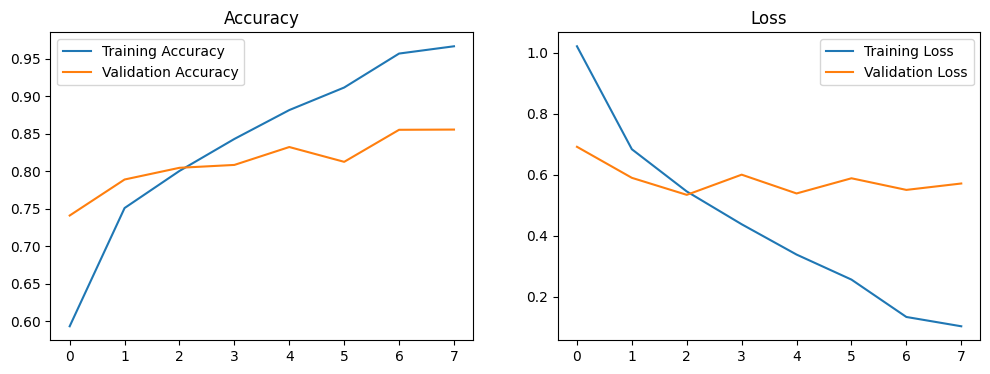

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

## Konversi Model

### Saved Model

In [ ]:
model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


### TF Lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
tflite_model = converter.convert()

In [ ]:
with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

### TFJS

Sebelumnya saya mengerjakan secara lokal melalui vsc, dikarenakan melalui pengerjaan lokal saya tidak bisa melakukan penyimpanan model kedalam TFJS dan saya berusaha memperbaiki error pip yang terinstall di komputer saya juga tidak bisa.<br>

Akhirnya saya memutuskan untuk menyimpan model TFJS melalui collab. caranya saya tidak menjalankan ulang model karena model sebelumnya sudah saya simpan di savedmodel. jadi saya hanya melakukan konversi dari savedmodel ke dalam TFJS. <br>

terima kasih.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install tensorflowjs

In [22]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /content/drive/MyDrive/dicoding/Machine_Learning/pengembangan_ml/saved_model \
    /content/saved_model_tfjs

2024-08-12 10:54:31.332568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 10:54:31.366595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 10:54:31.366666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-12 10:54:31.386668: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-12 10:54:32.746156: W tensorflow/compiler/tf

setelah berhasil dikonversi, saya akan mengunduh untuk disimpan di lokal dengan cara zip-ing.

In [24]:
!zip -r /content/saved_model_tfjs.zip /content/saved_model_tfjs

  adding: content/saved_model_tfjs/ (stored 0%)
  adding: content/saved_model_tfjs/group1-shard11of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard10of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard19of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard8of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard2of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard9of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard16of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard3of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard1of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard17of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard5of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard6of19.bin (deflated 7%)
  adding: content/saved_model_tfjs/group1-shard7of19.bin (deflated 7%)
  adding: content/saved_